# KMeans v2

In [12]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np

from src.cluster import k_means_elbow_analysis, silhouette_analysis, fit_kmeans

## Read in scaled features

In [13]:
df = pd.read_csv("../data/cohort_features_scaled_v2.csv", index_col="ID")
df.head(5)

,n_stays,anchor_age,suspected_infection,weight,height_chart,heart_rate_min,heart_rate_max,temperature_min,temperature_max,nbpm_min,...,dopamine,epinephrine,norepinephrine,phenylephrine,vasopressin,dobutamine,milrinone,albumin,bilirubin,abps
ID,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.909091,1,-1.329023,-1.333333,1.045455,0.571429,0.888889,1.000000,-1.733333,...,0,0,1,1,0,0,0,0,1,1
1,0.0,0.818182,1,-0.521152,0.333333,-0.500000,1.321429,-0.111111,-0.333333,-0.333333,...,0,0,0,1,0,0,0,0,0,1
2,0.0,0.181818,0,-0.922558,-0.466667,0.409091,0.428571,2.111111,0.500000,0.933333,...,0,0,0,0,0,0,0,0,1,1
3,0.0,-0.409091,1,0.986648,0.666667,0.545455,0.107143,0.888889,1.111111,0.333333,...,0,0,0,0,0,0,0,0,0,0
4,0.0,-1.000000,1,0.057344,0.533333,0.590909,0.535714,0.444444,0.111111,1.533333,...,0,0,0,0,0,0,0,1,1,1


## Parameter exploration

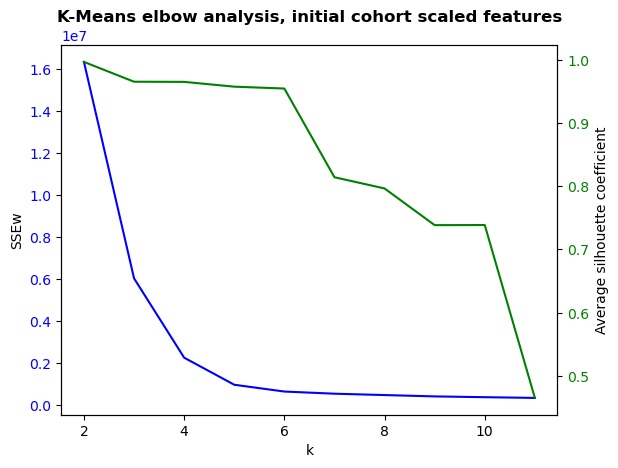

    k         sse_w  silhouette
0   2  1.635952e+07    0.996579
1   3  6.039793e+06    0.965274
2   4  2.258475e+06    0.965033
3   5  9.674912e+05    0.957454
4   6  6.431238e+05    0.954497
5   7  5.404939e+05    0.814214
6   8  4.755981e+05    0.796505
7   9  4.116733e+05    0.738481
8  10  3.741065e+05    0.738665
9  11  3.392303e+05    0.465285


In [14]:
"""
Use the elbow method to determine the "k", number of clusters
"""
# Determine the range of k values to analyse
k_max = 11
k_list = np.linspace(1, k_max, 11, dtype=int)[1:]

k_means_elbow_analysis(
    k_list, df,
    title=f"K-Means elbow analysis, initial cohort scaled features"
)

For k = 4 The average silhouette_score is : 0.9650334525573377
For k = 5 The average silhouette_score is : 0.9574541844638681
For k = 6 The average silhouette_score is : 0.9544974296823681


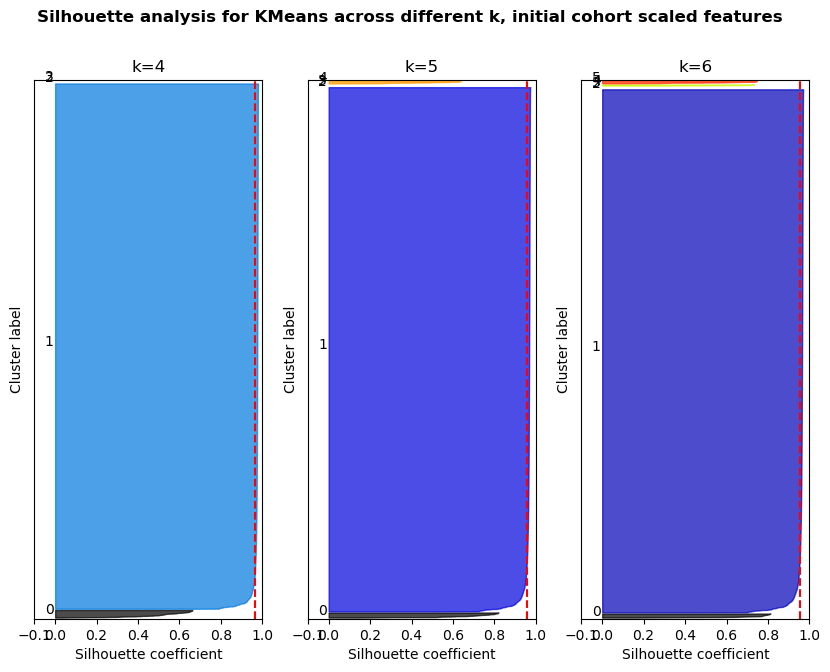

In [15]:
"""
Deep dive selected values of k

Below analysis is adapted from:
https://scikit-learn.org/0.24/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
"""

range_k = [4, 5, 6]

silhouette_analysis(
    range_k, df,
    title=f"Silhouette analysis for KMeans across different k, initial cohort scaled features"
)

## Assign the clusters

In [16]:
k = 5
_, kmeans = fit_kmeans(args=(k, df))
assigned_clusters = pd.DataFrame(kmeans.predict(df), columns=["cluster"])
assigned_clusters.index.name = "ID"
assigned_clusters.to_csv(f"../data/cohort_clusters_kmeans_{k}_v2.csv")
assigned_clusters

,cluster
ID,
0,1
1,1
2,1
3,1
4,1
...,...
4643,1
4644,1
4645,1


In [17]:
assigned_clusters.value_counts()

cluster
1          4579
0            45
4            22
2             1
3             1
dtype: int64

## Generate the COS

In [18]:
# Get the cluster label for COS
cos_label = assigned_clusters.value_counts().index[0][0]
cos_label

1

In [19]:
# Load the original dataset with the unscaled features
df_original = pd.read_csv("../data/cohort_processed_v2.csv", index_col="ID")
df_original

,subject_id,hadm_id,stay_id,n_stays,sum_los,anchor_age,suspected_infection,weight,height_chart,heart_rate_min,...,dopamine,epinephrine,norepinephrine,phenylephrine,vasopressin,dobutamine,milrinone,albumin,bilirubin,abps
ID,,,,,,,,,,,,,,,,,,,,,
0,10002428,28662225,33987268,2,12.014028,80,1,43.00,150.0,93.0,...,0,0,1,1,0,0,0,0,1,1
1,10004422,21255400,32155744,1,6.356898,78,1,66.95,175.0,59.0,...,0,0,0,1,0,0,0,0,0,1
2,10004606,29242151,30213599,1,5.166100,64,0,55.05,163.0,79.0,...,0,0,0,0,0,0,0,0,1,1
3,10004733,27411876,39635619,1,8.357373,51,1,111.65,180.0,82.0,...,0,0,0,0,0,0,0,0,0,0
4,10005606,29646384,38740124,1,6.595347,38,1,84.10,178.0,83.0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4643,19995595,21784060,34670930,1,18.659109,68,1,94.70,163.0,51.0,...,0,0,0,1,0,0,0,0,0,1
4644,19995780,21942461,36805359,1,3.383530,84,0,87.40,168.0,62.0,...,0,0,0,1,0,0,0,0,0,1
4645,19997448,23560173,33380030,2,3.656262,52,0,86.30,160.0,73.0,...,0,0,0,1,0,0,0,0,0,1


In [20]:
df_cluster = pd.merge(left=df_original, right=assigned_clusters, on="ID")
cos = df_cluster[df_cluster["cluster"] == cos_label].drop(columns=["cluster"])
cos.to_csv("../data/cos_features_kmeans_v2.csv")
cos

,subject_id,hadm_id,stay_id,n_stays,sum_los,anchor_age,suspected_infection,weight,height_chart,heart_rate_min,...,dopamine,epinephrine,norepinephrine,phenylephrine,vasopressin,dobutamine,milrinone,albumin,bilirubin,abps
ID,,,,,,,,,,,,,,,,,,,,,
0,10002428,28662225,33987268,2,12.014028,80,1,43.00,150.0,93.0,...,0,0,1,1,0,0,0,0,1,1
1,10004422,21255400,32155744,1,6.356898,78,1,66.95,175.0,59.0,...,0,0,0,1,0,0,0,0,0,1
2,10004606,29242151,30213599,1,5.166100,64,0,55.05,163.0,79.0,...,0,0,0,0,0,0,0,0,1,1
3,10004733,27411876,39635619,1,8.357373,51,1,111.65,180.0,82.0,...,0,0,0,0,0,0,0,0,0,0
4,10005606,29646384,38740124,1,6.595347,38,1,84.10,178.0,83.0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4643,19995595,21784060,34670930,1,18.659109,68,1,94.70,163.0,51.0,...,0,0,0,1,0,0,0,0,0,1
4644,19995780,21942461,36805359,1,3.383530,84,0,87.40,168.0,62.0,...,0,0,0,1,0,0,0,0,0,1
4645,19997448,23560173,33380030,2,3.656262,52,0,86.30,160.0,73.0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
df_cluster

,subject_id,hadm_id,stay_id,n_stays,sum_los,anchor_age,suspected_infection,weight,height_chart,heart_rate_min,...,epinephrine,norepinephrine,phenylephrine,vasopressin,dobutamine,milrinone,albumin,bilirubin,abps,cluster
ID,,,,,,,,,,,,,,,,,,,,,
0,10002428,28662225,33987268,2,12.014028,80,1,43.00,150.0,93.0,...,0,1,1,0,0,0,0,1,1,1
1,10004422,21255400,32155744,1,6.356898,78,1,66.95,175.0,59.0,...,0,0,1,0,0,0,0,0,1,1
2,10004606,29242151,30213599,1,5.166100,64,0,55.05,163.0,79.0,...,0,0,0,0,0,0,0,1,1,1
3,10004733,27411876,39635619,1,8.357373,51,1,111.65,180.0,82.0,...,0,0,0,0,0,0,0,0,0,1
4,10005606,29646384,38740124,1,6.595347,38,1,84.10,178.0,83.0,...,0,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4643,19995595,21784060,34670930,1,18.659109,68,1,94.70,163.0,51.0,...,0,0,1,0,0,0,0,0,1,1
4644,19995780,21942461,36805359,1,3.383530,84,0,87.40,168.0,62.0,...,0,0,1,0,0,0,0,0,1,1
4645,19997448,23560173,33380030,2,3.656262,52,0,86.30,160.0,73.0,...,0,0,1,0,0,0,0,0,1,1


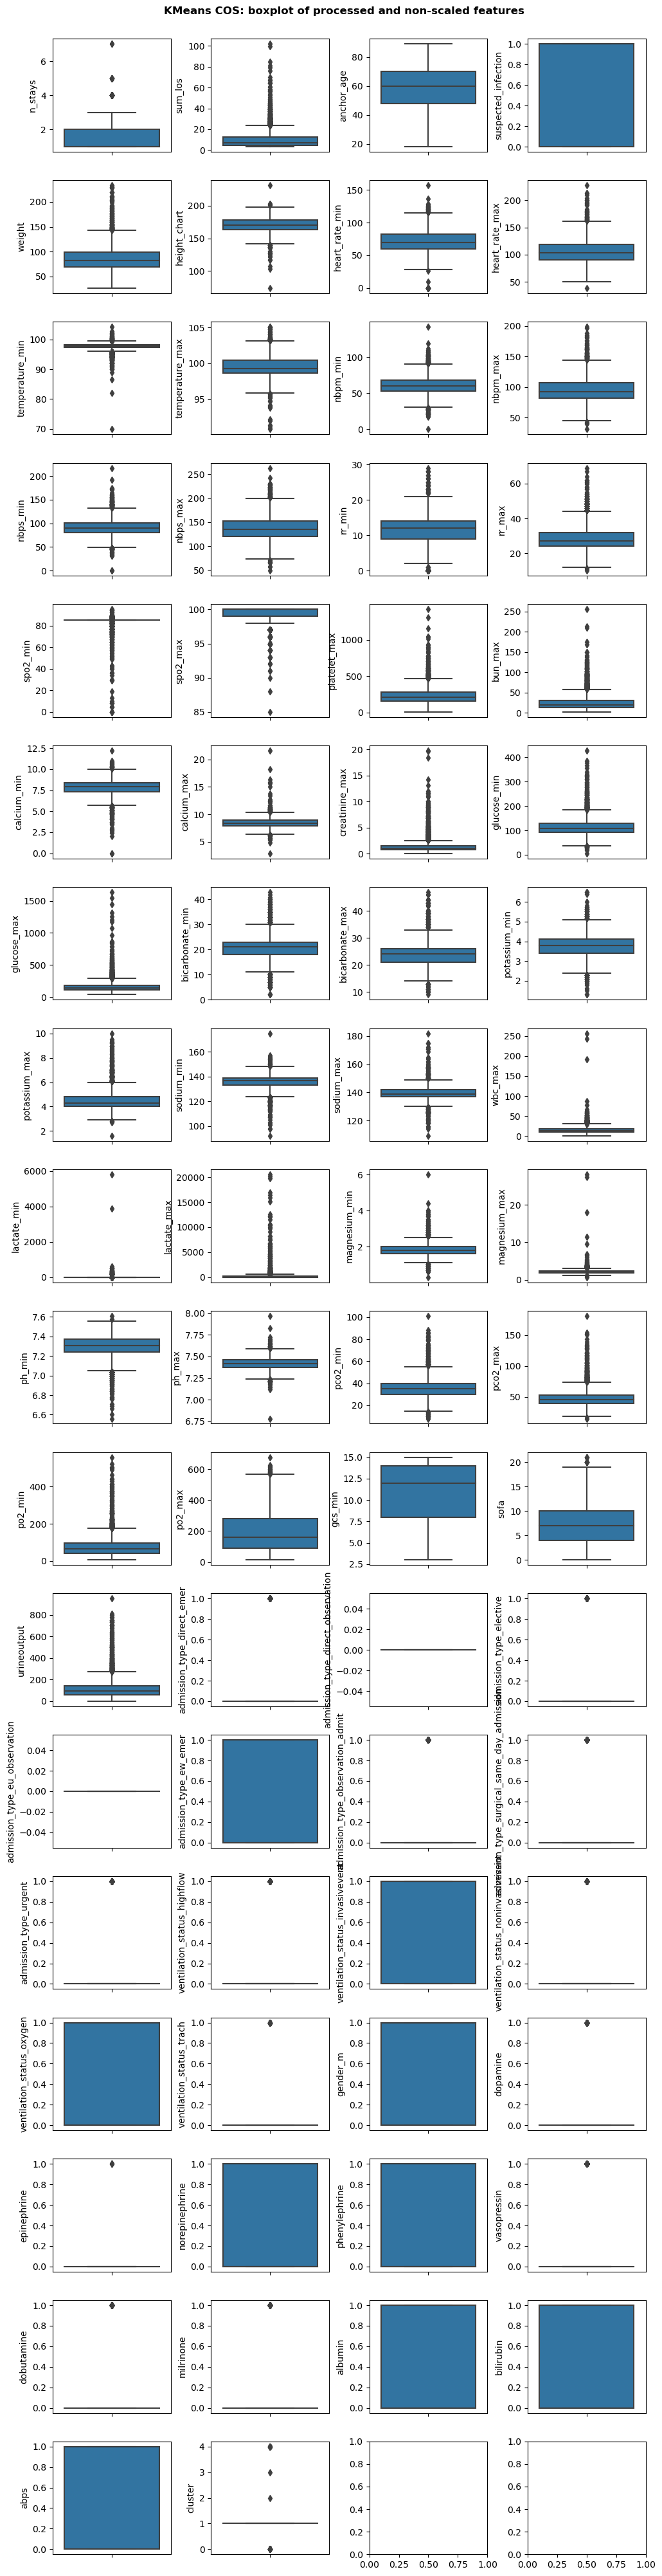

In [24]:
from src.data_processing import plot_cohort_statistics

plot_cohort_statistics(
    df_cluster.drop(columns=["subject_id", "hadm_id", "stay_id"]),
    title="KMeans COS: boxplot of processed and non-scaled features",
    figsize=(10, 40),
    across=4
)